In [2]:
#In this example, support vector classifier is used as for multivariable classification
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [17]:
#load the iris dataset, this time from sklearn datasets
data = load_iris() 

X =data.data
y = data.target




['setosa' 'versicolor' 'virginica']


In [4]:
# Convert labels to one-hot encoded format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = torch.tensor(y, dtype=torch.float32)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [8]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [9]:
# Initialize the model
input_size = X_train.shape[1]
hidden_size = 16
num_classes = len(label_encoder.classes_)
model = NeuralNetwork(input_size, hidden_size, num_classes)

In [10]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.squeeze().long())
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.9658
Epoch [200/1000], Loss: 0.7646
Epoch [300/1000], Loss: 0.6061
Epoch [400/1000], Loss: 0.4980
Epoch [500/1000], Loss: 0.4187
Epoch [600/1000], Loss: 0.3509
Epoch [700/1000], Loss: 0.2929
Epoch [800/1000], Loss: 0.2444
Epoch [900/1000], Loss: 0.2056
Epoch [1000/1000], Loss: 0.1754


In [12]:
# Evaluation
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = torch.sum(predicted == y_test.squeeze().long()).item() / y_test.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 1.0000


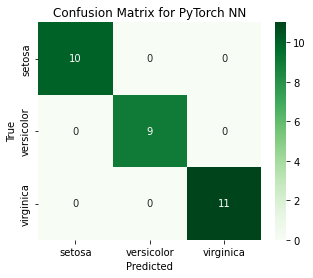

In [21]:
# Creating  a confusion matrix,which compares the y_test and y_pred

# Convert predicted tensor to numpy array
y_pred_np = predicted.numpy()

# Convert labels back to original class labels
y_test_np = y_test.squeeze().numpy()

cm = confusion_matrix(y_test_np, y_pred_np)

class_labels = ['setosa', 'versicolor', 'virginica']

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for PyTorch NN')

# Display the plot
plt.show()